# Probability, Information Theory & Statistics

*Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before. Whereas *Statistics* builds on probability theory to enable us to quantify our confidence about how distributions of data are related to one another. 

You’ll develop a working understanding of 

- Variables, probability distributions, metrics for assessing distributions, and graphical models.
- Information theory to measure how much meaningful signal there is within some given data. 
- Essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning. 
* Understand the appropriate variable type and probability distribution for representing a given class of data, as well as the standard techniques for assessing the relationships between distributions.
* Apply information theory to quantify the proportion of valuable signal that’s present amongst the noise of a given probability distribution.
* Hypothesize about and critically evaluate the inputs and outputs of machine learning algorithms using essential statistical tools such as the t-test, ANOVA, and R-squared.

## Outline

*Part 1: Introduction to Probability*
* What Probability Theory Is
* A Brief History: Frequentists vs Bayesians
* Applications of Probability to Machine Learning
* Random Variables
* Discrete vs Continuous Variables
* Probability Mass and Probability Density Functions
* Expected Value
* Measures of Central Tendency: Mean, Median, and Mode
* Quantiles: Quartiles, Deciles, and Percentiles
* Measures of Dispersion: Variance, Standard Deviation, and Standard Error
* Measures of Relatedness: Covariance and Correlation
* Marginal and Conditional Probabilities
* Independence and Conditional Independence

*Part 2: Distributions in Machine Learning*
* Uniform
* Gaussian: Normal and Standard Normal
* The Central Limit Theorem
* Log-Normal
* Exponential and Laplace
* Binomial and Multinomial
* Poisson
* Mixture Distributions
* Preprocessing Data for Model Input

*Part 3: Information Theory*
* What Information Theory Is
* Self-Information
* Nats, Bits and Shannons
* Shannon and Differential Entropy
* Kullback-Leibler Divergence
* Cross-Entropy

*Part 4: Introduction to Statistics*
* *z*-scores and Outliers
* *p*-values
* Comparing Means with t-tests
* Confidence Intervals
* ANOVA: Analysis of Variance
* Pearson Correlation Coefficient
* R-Squared Coefficient of Determination
* Correlation vs Causation
* Correcting for Multiple Comparisons 

## Part 1: Introduction to Probability

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### What Probability Theory Is

#### Events and Sample Spaces

Let's assume we have a fair coin, which is equally likely to come up heads (H) or tails (T).

In instances like this, where the two outcomes are equally likely, we can use probability theory to express the likelihood of a particular **event** by comparing it with the **sample space** (the set of all possible outcomes; can be denoted as $\Omega$): 

$$ P(\text{event}) = \frac{\text{\# of outcomes of event}}{\text{\# of outcomes in }\Omega} $$

If we're only flipping the coin once, then there are only two possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).

Therefore: $$ P(H) = \frac{1}{2} = 0.5 $$

Equally: $$ P(T) = \frac{1}{2} = 0.5 $$

As a separate example, consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is 52. 

There is only one ace of spades in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$

In contrast there are four aces, so the probability of drawing an ace is: $$ P(\text{ace}) = \frac{4}{52} \approx 0.077 $$

Some additional examples: 
$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$
$$ P(\text{ace OR spade}) = \frac{16}{52} \approx 0.307 $$
$$ P(\text{card}) = \frac{52}{52} = 1 $$
$$ P(\text{turnip}) = \frac{0}{52} = 0 $$

#### Multiple Independent Observations

Let's return to coin flipping to illustrate situations where we have an event consisting of multiple independent observations. For example, the probability of throwing two consecutive heads is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ ...because there is one HH event in the sample set of four possible events ($\Omega$ = {HH, HT, TH, TT}).

Likewise, the probability of throwing *three* consecutive heads is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$ ...because there is one HHH event in the sample set of eight possible events ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}).

As final examples, the probability of throwing exactly two heads in three tosses is $ P = \frac{3}{8} = 0.375 $ while the probability of throwing at least two heads in three tosses is $ P = \frac{4}{8} = 0.5 $.

#### Combining Probabilities

In order to combine probabilities, we can multiply them. So the probability of throwing five consecutive heads, for example, is the product of probabilities we've already calculated: $$ P(\text{HHHHH}) = P(\text{HH}) \times P(\text{HHH}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$

#### Combinatorics

*Combinatorics* is a field of mathematics devoted to counting that can be helpful to studying probabilities. We can use **factorials** (e.g., $4! = 4 \times 3 \times 2 \times 1 = 24$), which feature prominently in combinatorics, to calculate probabilities instead of painstakingly determining all of the members of the sample space $\Omega$ and counting subsets within $\Omega$. 

More specifically, we can calculate the number of outcomes of an event using the "number of combinations" equation: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

The left-hand side of the equation is read "$n$ choose $k$" and is most quickly understood via an example: If we have three coin flips, $n = 3$, and if we're interested in the number of ways to get two head flips (or two tail flips, for that matter), $k = 2$. We would read this as "3 choose 2" and calculate it as:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

This provide us with the numerator for event-probability equation from above:
$$ P(\text{event}) = \frac{\text{\# of outcomes of event}}{\text{\# of outcomes in }\Omega} $$

In the case of coin-flipping (or any binary process with equally probable outcomes), the denominator can be calculated with $2^n$ (where $n$ is again the number of coin flips), so: 

$$ \frac{\text{\# of outcomes of event}}{\text{\# of outcomes in }\Omega} = \frac{3}{2^n} = \frac{3}{2^3} = \frac{3}{8} = 0.375 $$

**Exercises**:

1. What is the probability of drawing the ace of spades twice in a row? (Assume that any card drawn on the first draw will be put back in the deck before the second draw.)
2. You draw a card from a deck of cards. After replacing the drawn card back in the deck and shuffling thoroughly, what is the probability of drawing the same card again? 
3. Use $n \choose k$ to calculate the probability of throwing three heads in five coin tosses.
4. Create a Python method that solves exercise 3 and incorporates the $n \choose k$ formula $\frac{n!}{k!(n - k)!}$. With the method in hand, calculate the probability of -- in five tosses -- throwing each of zero, one, two, three, four, and five heads.

1. $$ P(\text{ace of spades}) \times P(\text{ace of spades}) = \left(\frac{1}{52}\right)^2 = \frac{1}{2704} = 0.00037 = 0.037\% $$

2. $$ P(\text{any card}) = \frac{52}{52} = 1 $$
$$ P(\text{same card as first draw}) = \frac{1}{52} \approx 0.019 $$
$$ P(\text{any card})P(\text{same card as first draw}) = (1)(\frac{1}{52}) = \frac{1}{52} \approx 0.019$$

3. $$ {n \choose k} = {5 \choose 3} = \frac{5!}{3!(5 - 3)!} = \frac{5!}{(3!)(2!)} = \frac{5 \times 4 \times 3 \times 2 \times 1}{(3 \times 2 \times 1)(2 \times 1)} = \frac{120}{(6)(2)} = \frac{120}{12} = 10 $$

4. $$P = \frac{10}{2^n} = \frac{10}{2^5} = \frac{10}{32} = 0.3125 $$

In [2]:
from math import factorial

In [3]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [4]:
coinflip_prob(5, 3)

0.3125

In [5]:
[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

#### The Law of Large Numbers

While a fair coin should land heads up 50% of the time, as we've seen above, with small sample sizes, there is a non-trivial possibility that in a given experiment we could flip heads on all of the tosses. For example, we've calculated that there's a 3.1% chance that we'll get heads on every toss in a small five-toss experiment. 

The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability. 

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment: 

In [6]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]) 

In [7]:
np.random.seed(42) # for reproducibility

We will discuss the `binomial()` method in more detail in *Part 2*. For now it suffices to think of its two arguments as *number of coin flips in experiment* and *probability of heads*, while it returns the number of flips that are heads in the experiment.

In [8]:
np.random.binomial(1, 0.5)

0

In [9]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [10]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

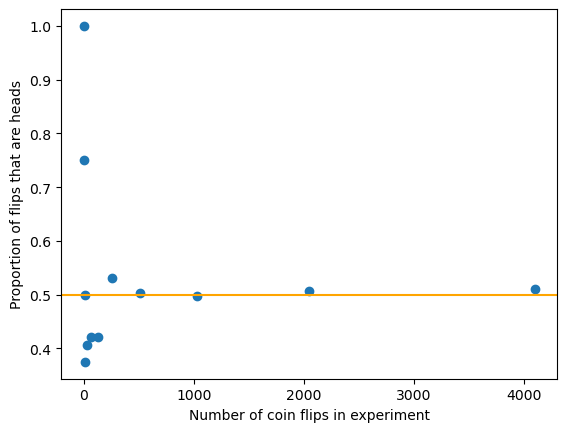

In [11]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

It is important at this juncture to address the **gambler's fallacy**. It is a common misconception that the law of large numbers dictates that if, say, five heads have been flipped in a row, then the probability of tails is higher on the sixth flip. In fact, probability theory holds that each coin flip is completely independent of all others. Thus, every single flip of a fair coin has a 50% chance of being heads, no matter what happened on preceding flips.

(To capitalize on this misunderstanding, roulette tables at casinos often have prominent displays tracking the history of red versus black even though there's a 47.4% chance of each on every spin of the roulette wheel no matter what happened on preceding spins. Gamblers will note, say, five reds in a row at a given table and flock to it to bet on black.) 

#### Statistics

The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence. For example, let's say we ran the five-coin-flip experiment 1000 times with a fair coin: 

In [12]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

We can plot the results of our experiment to create a **probability distribution**: 

In [13]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [14]:
heads

array([0, 1, 2, 3, 4, 5])

In [15]:
event_count

array([ 33, 181, 285, 313, 160,  28])

In [16]:
event_proba = event_count/n_experiments
event_proba

array([0.033, 0.181, 0.285, 0.313, 0.16 , 0.028])

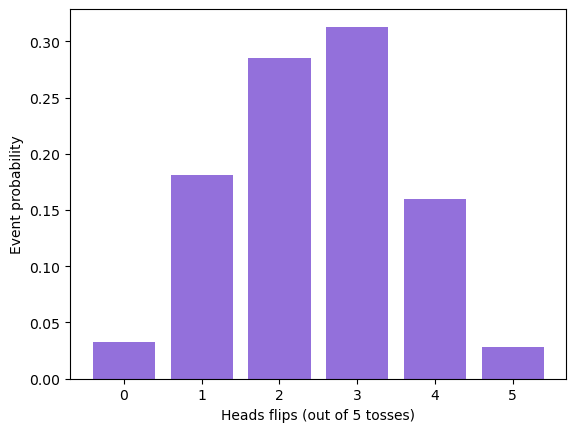

In [17]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Let's say we'd like to now test a coin as to whether it's fair or not. We flip it five times and all five times it comes up heads. Does this imply it's not a fair coin? Statistics arms us with tools to use the probability distribution above to answer this question with a particular degree of confidence. 

### Expected Value

In [18]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

$$ \mathbb{E} = \sum_x xP(x) $$

In [19]:
E = sum([P[x]*x for x in range(6)])
E

2.5

**Exercises**:

1. Assuming heads = 1 and tails = 0, what’s the expected value of the toss of a fair coin? 
2. ...and of two tosses of a fair coin? 
3. You are one of a thousand people to purchase a lottery ticket. The ticket costs \\$10 and pays out \\$5000. What value should you expect from this transaction? 


### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [20]:
len(heads_count)

1000

In [21]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [22]:
sum(heads_count)/len(heads_count)

2.47

Unsurprisingly, NumPy comes with a built-in function:

In [23]:
np.mean(heads_count)

2.47

In [24]:
heads_count.mean() # fun!

2.47

Pretty close! The law of large numbers implies that as we increase the number of experiments (e.g., to a million -- you're welcome to try it), we'll converge on $\mathbb{E}=2.5$.

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [25]:
heads_count.sort()

In [26]:
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [28]:
len(heads_count)

1000

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint: 

In [29]:
heads_count[499]

3

In [30]:
heads_count[500]

3

...which in this case is obviously three: 

In [31]:
(3+3)/2

3.0

Built-in method:

In [32]:
np.median(heads_count)

3.0

#### Mode

The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.

As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three. 

Method available in the SciPy `stats` module:

In [33]:
st.mode(heads_count)

ModeResult(mode=3, count=313)

In [34]:
st.mode(heads_count)[0]

3

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed: 

In [35]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

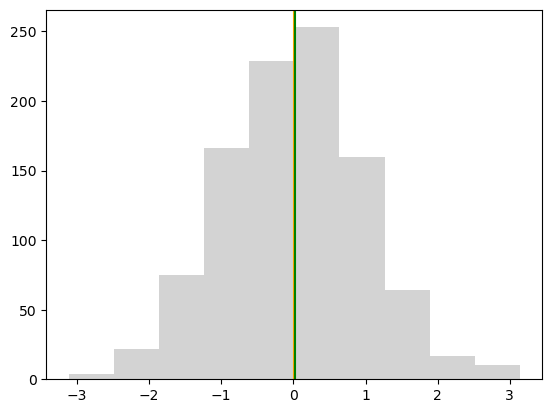

In [36]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode typically only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail: 

In [37]:
x = st.skewnorm.rvs(10, size=1000) 

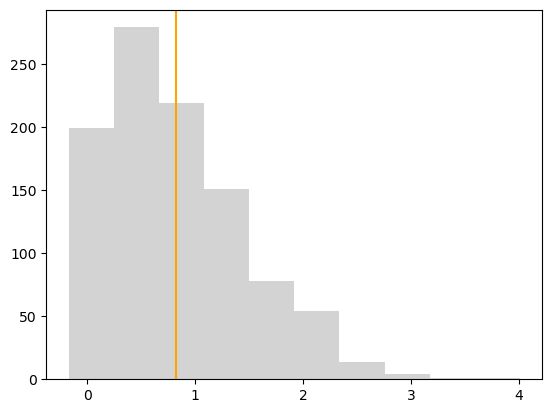

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

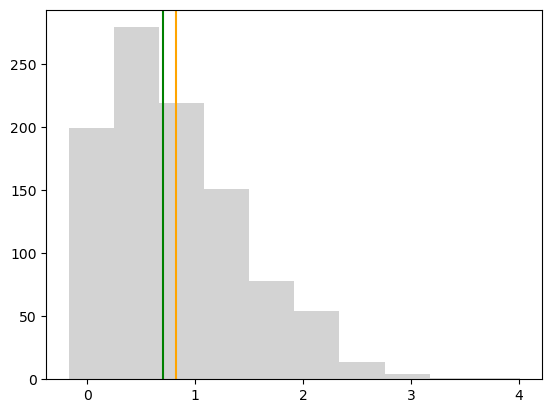

In [39]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Quantiles

The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [40]:
np.median(x)

0.6987365121323832

In [41]:
np.quantile(x, 0.5)

0.6987365121323832

Generally speaking, quantiles divide up distributions and the most common are:

* Percentiles, 
* Quartiles, and
* Deciles.

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [42]:
p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

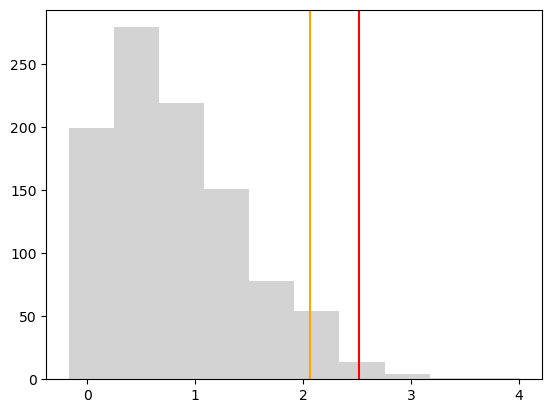

In [43]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Note that the Numpy `quantile()` method is identical to the `percentile()` method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter: 

In [44]:
np.quantile(x, [.95, .99])

array([2.06249928, 2.51830108])

**Quartiles**, as their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile: 

In [45]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

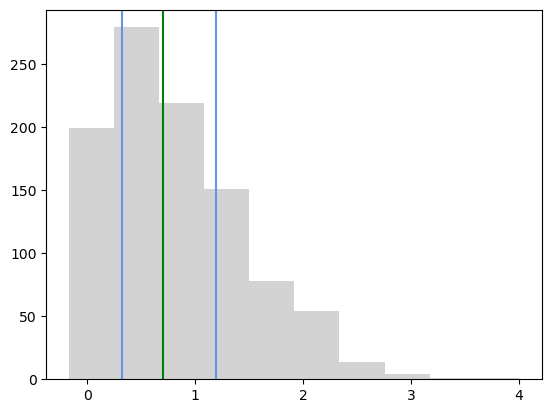

In [46]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

Finally, **deciles** (from Latin *decimus*, meaning "tenth") divide a distribution into ten evenly-sized segments: 

In [47]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [48]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

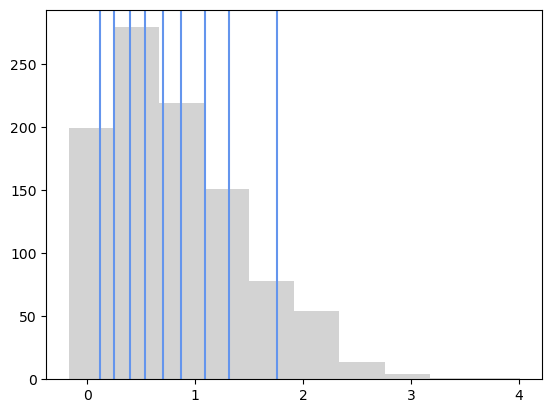

In [49]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

### Measures of Dispersion

IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are: 

* Variance,
* Standard deviation, and
* Standard error. 

**Variance** (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it: 
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

(The astute follower of the *Machine Learning Foundations* series may notice that this formula is the same as mean-squared-error cost, except $x_i$ is being compared to the mean $\mu$ instead of a predicted value $\hat{x}_i$.)

(Technically speaking, we should divide by $n$-1 with a sample of data, but with the large datasets typical of machine learning, it's a negligible difference. If $n$ were equal to a small number like 8 then it would matter.)

(Also technically speaking, the variance of a sample is typically denoted with $s^2$ as opposed to the Greek $\sigma^2$, akin to how $\bar{x}$ denotes the mean of a sample while the Greek $\mu$ is reserved for population mean.)

As an example let's calculate the variance of the PDF `x` from earlier: 

In [50]:
xbar = np.mean(x)
xbar

0.821957388088226

In [51]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [52]:
squared_differences[0:10]

[0.07183786340906652,
 0.8722478661864915,
 0.13342188387276055,
 0.38866260672656294,
 0.6040403927885852,
 2.884828656909768,
 0.35404583659090216,
 0.02600064799461338,
 0.4072114715667349,
 0.7998927302046773]

In [53]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.3981358598225055

Of course there's a built-in NumPy method: 

In [54]:
np.var(x)

0.3981358598225057

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [55]:
sigma = sigma_squared**(1/2)
sigma

0.6309800787841923

In [56]:
np.std(x)

0.6309800787841925

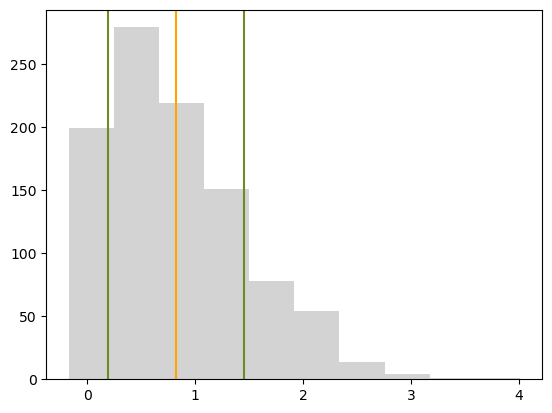

In [57]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_{\bar{x}}$:
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

In [58]:
sigma/(len(x))**(1/2)

0.019953342071505353

In [59]:
st.sem(x) # defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of ML

0.01996332623128527

In [60]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

0.01995334207150536

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Measures of Relatedness

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [61]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
x = iris.sepal_length
y = iris.petal_length

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


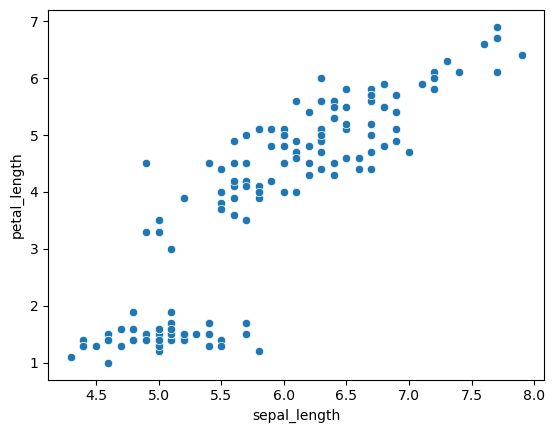

In [63]:
_ = sns.scatterplot(x=x, y=y)

In [64]:
n = len(x)

In [65]:
xbar = sum(x)/n
ybar = sum(y)/n

In [66]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [67]:
cov = sum(product)/n
cov

1.2658199999999995

The NumPy `cov()` method returns a **covariance matrix**, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space: 

In [68]:
np.cov(x, y, ddof=0) # again, defaults to ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix represent the variance of $x$ and $y$, respectively: 

In [69]:
np.var(x)

0.6811222222222222

In [70]:
np.var(y)

3.0955026666666674

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero: 

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


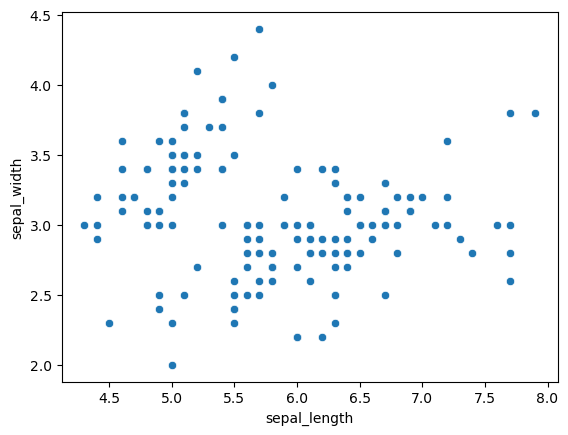

In [71]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [72]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

#### Correlation

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [73]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [74]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

In [75]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [76]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.1518982607114483)

The second value output of `pearsonr` is a measure of statistical significance, which we'll detail in *Intro to Stats*. 

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation: 

In [77]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300195

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively: 

In [78]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865833

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

## Part 2: Distributions in Machine Learning

### Uniform

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain: 

In [79]:
u = np.random.uniform(size=10000)

In [80]:
sns.set_style('ticks')

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


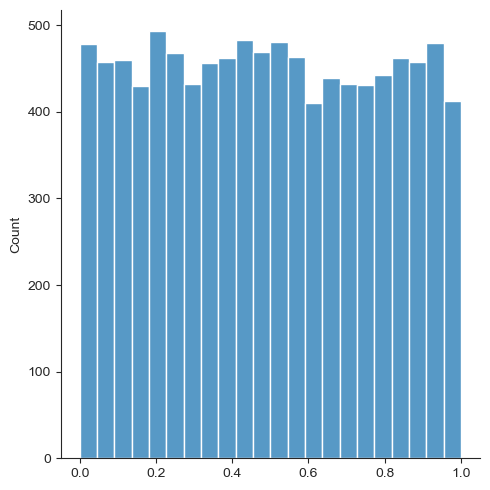

In [81]:
_ = sns.displot(u)

Real-world examples include: 

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**: 

In [82]:
x = np.random.normal(size=10000)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


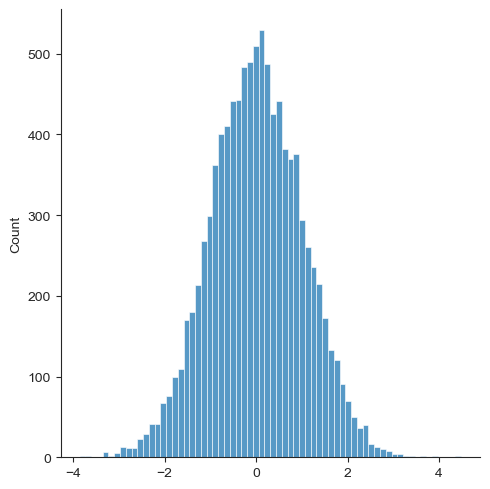

In [83]:
_ = sns.displot(x)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


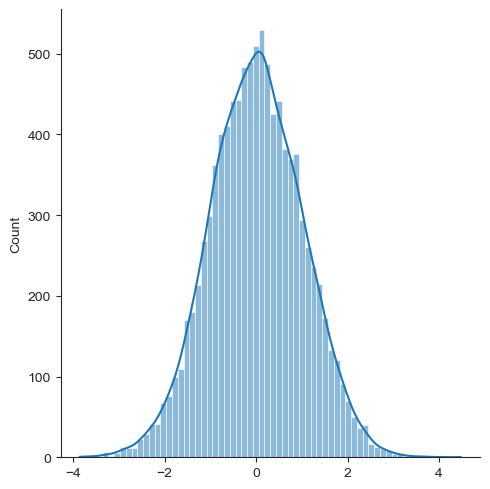

In [84]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [85]:
np.mean(x)

0.010746657894433886

In [86]:
np.std(x)

1.006376502514602

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

In [87]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

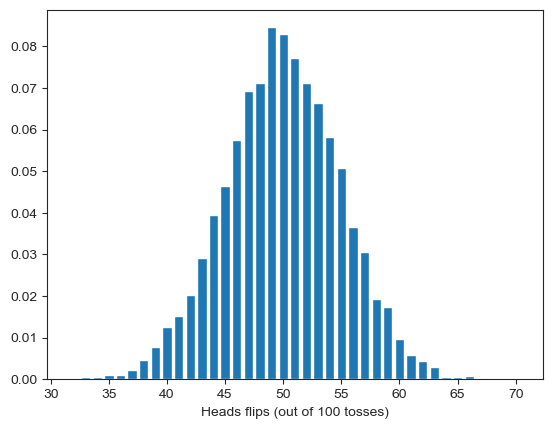

In [88]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [89]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.32659596, -0.93700698,  2.27851732,  1.21587356,  1.35370984,
       -0.4057365 ,  0.38816803, -0.55343125, -1.6885922 , -2.33595362])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [90]:
np.mean(x_sample)

-0.03578558368006331

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [91]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


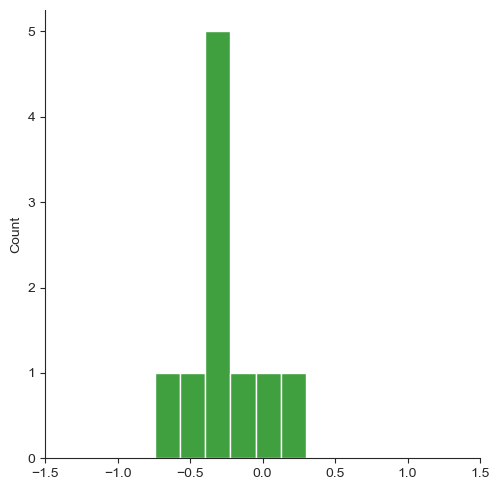

In [92]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


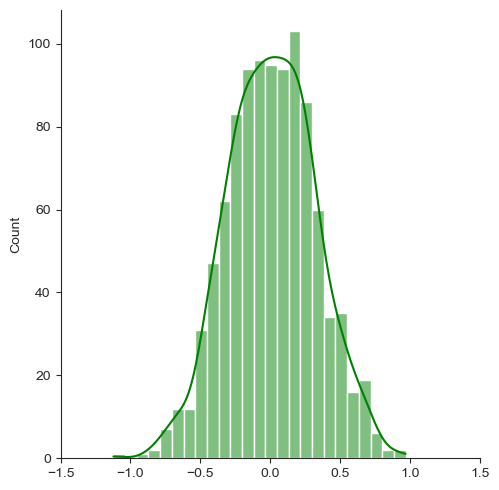

In [93]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


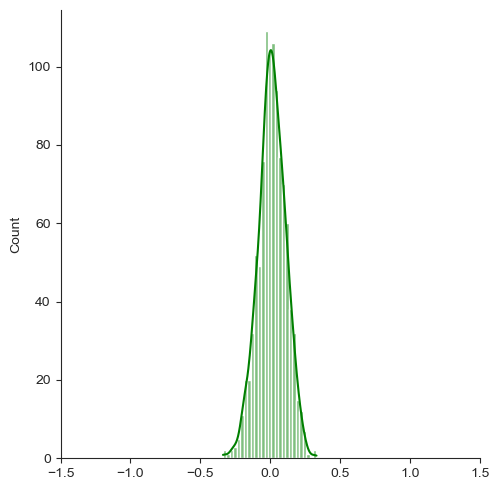

In [94]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


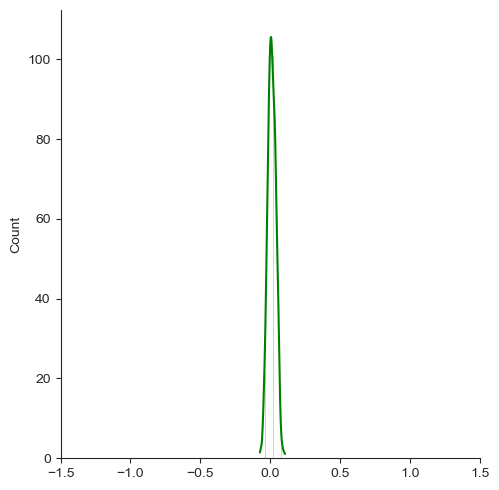

In [95]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [96]:
s = st.skewnorm.rvs(10, size=10000)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


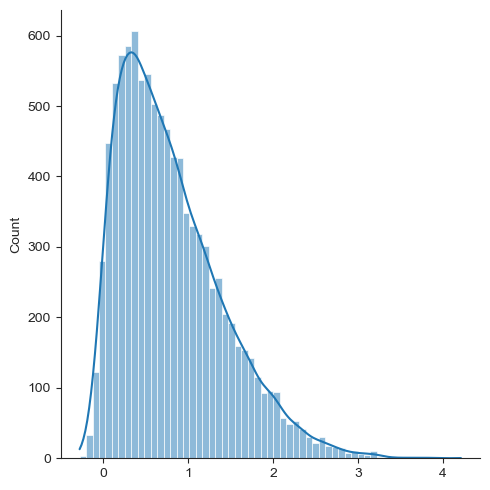

In [97]:
_ = sns.displot(s, kde=True)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


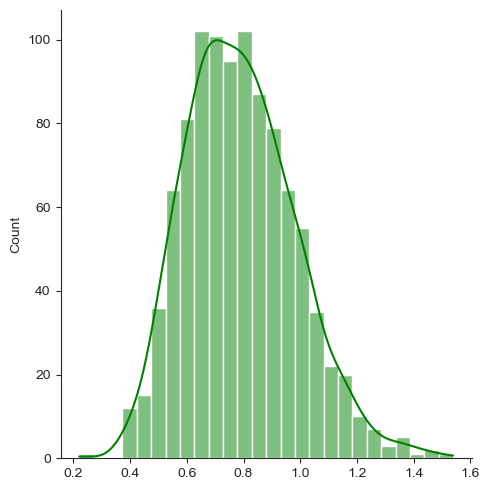

In [98]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


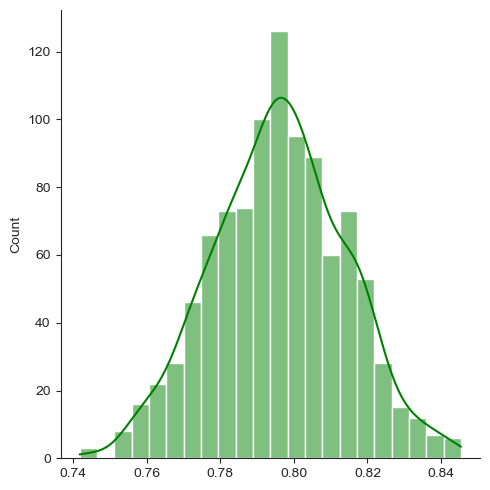

In [99]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [100]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


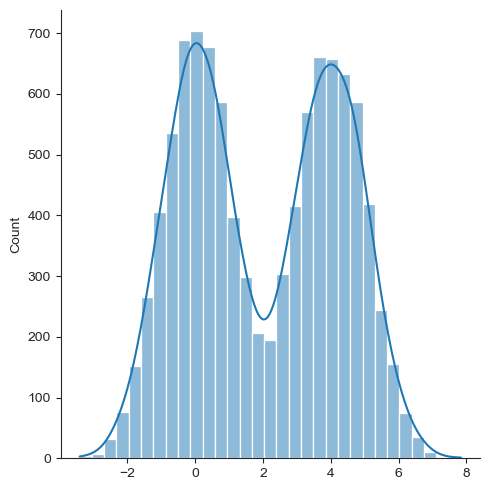

In [101]:
_ = sns.displot(m, kde=True)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


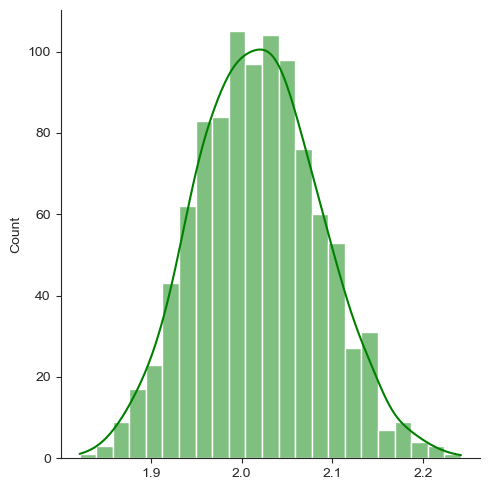

In [102]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


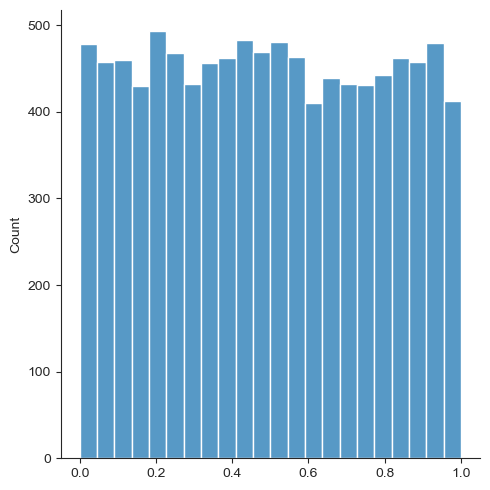

In [103]:
_ = sns.displot(u)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


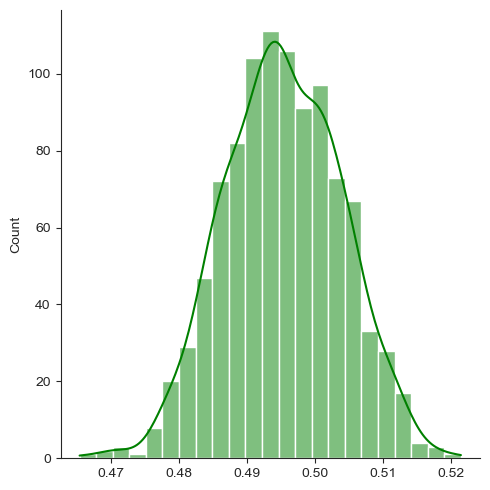

In [104]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

### Log-Normal Distribution

The natural logarithm of the **log-normal** distribution is normally distributed: 

In [105]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


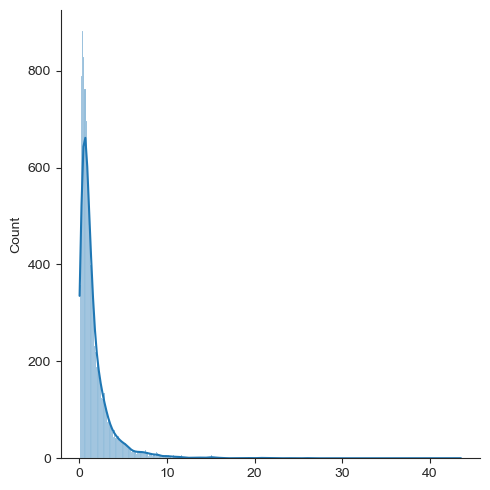

In [106]:
_ = sns.displot(x, kde=True)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


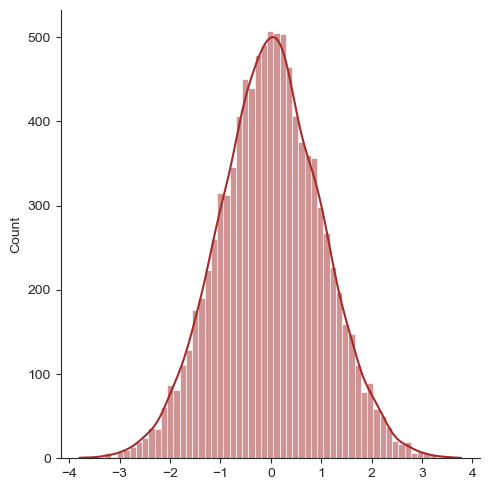

In [107]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files 
* Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution

Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

In [108]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


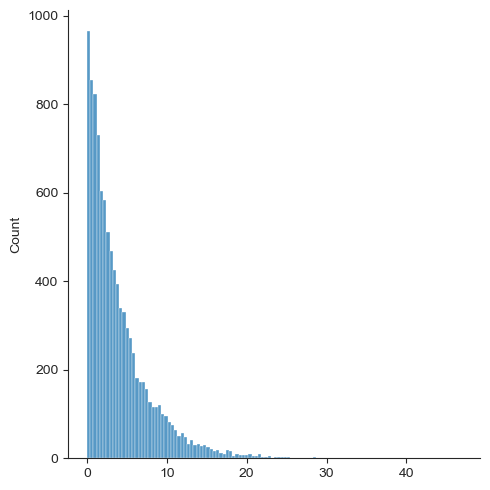

In [109]:
_ = sns.displot(x)

Its logarithm has a skewed distribution: 

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


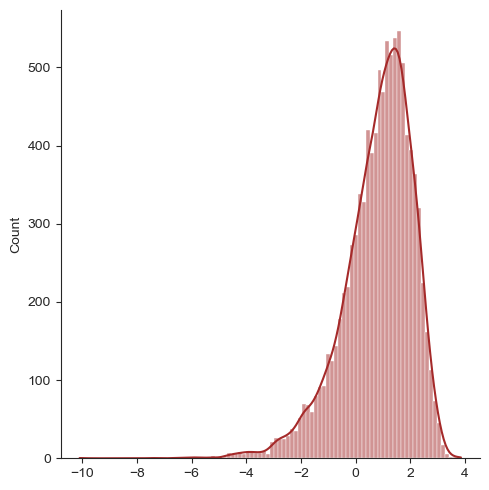

In [110]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution

Named after Pierre-Simon Laplace, whom we mentioned (and pictured) earlier as a key figure in the development of Bayesian statistics.

In [111]:
x = np.random.laplace(size=10000)

Alternatively referred to as the "double exponential distribution":

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


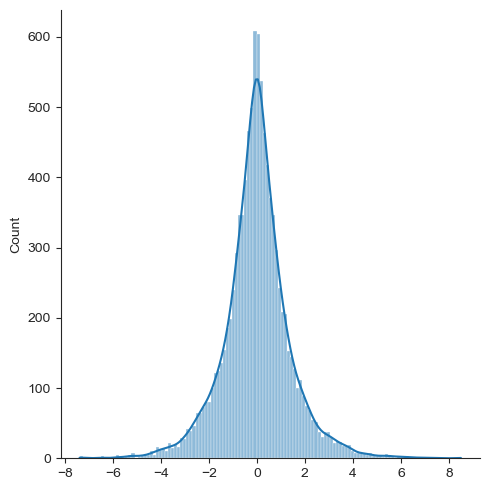

In [112]:
_ = sns.displot(x, kde=True)

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value: 

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


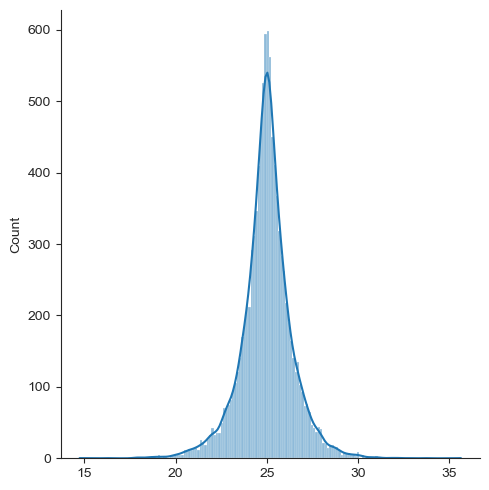

In [113]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Real-world examples: 

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution

All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [114]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

In [115]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

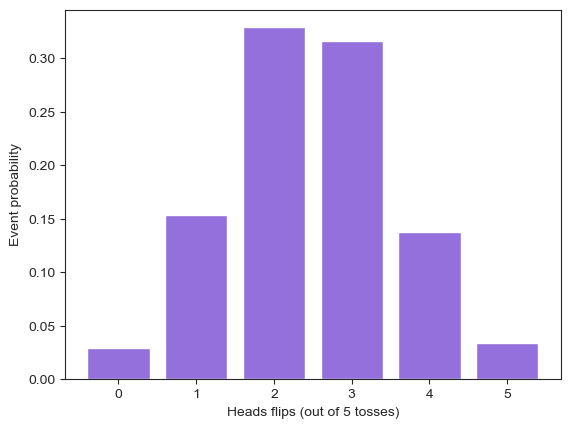

In [116]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Weighted coin (p = 0.8)

In [117]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

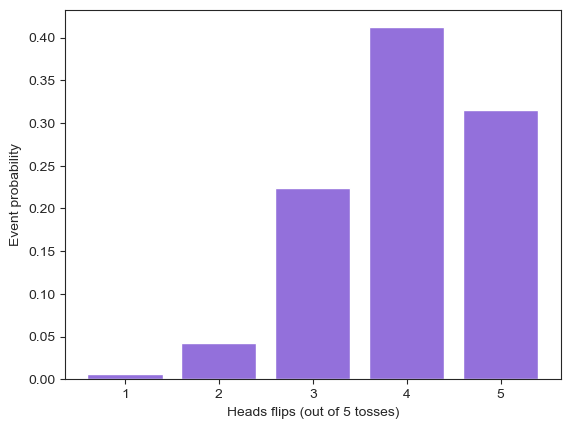

In [118]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [119]:
np.random.binomial(1, 0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [120]:
n = 1000

In [121]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([176, 151, 178, 183, 171, 141])

In [122]:
event_proba = rolls/n

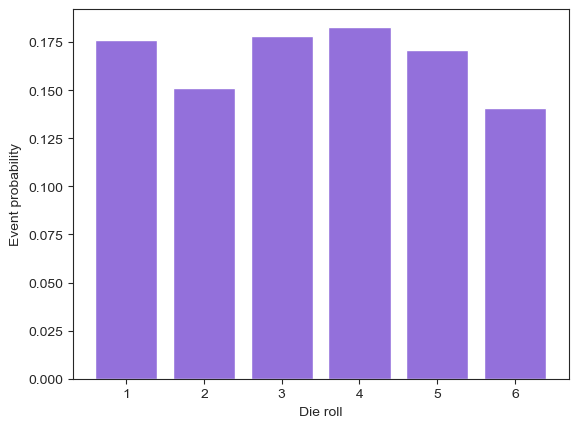

In [123]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [124]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 1, 0])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.

### Poisson Distribution

**Poisson** is a third widely-used distribution for discrete random variables and it's the final distribution we'll cover.

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.: 

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [125]:
lam=5

Second argument is number of samples to draw: 

In [126]:
n=1000

In [127]:
samples = np.random.poisson(lam, n) 

In [128]:
samples[0:20]

array([4, 3, 2, 2, 6, 6, 6, 5, 5, 3, 6, 4, 5, 6, 3, 6, 7, 6, 5, 4])

In [129]:
x, x_count = np.unique(samples, return_counts=True)

In [130]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [131]:
x_count

array([  6,  43,  82, 146, 166, 162, 141, 132,  54,  33,  20,   8,   5,
         2])

In [132]:
Px = x_count/n

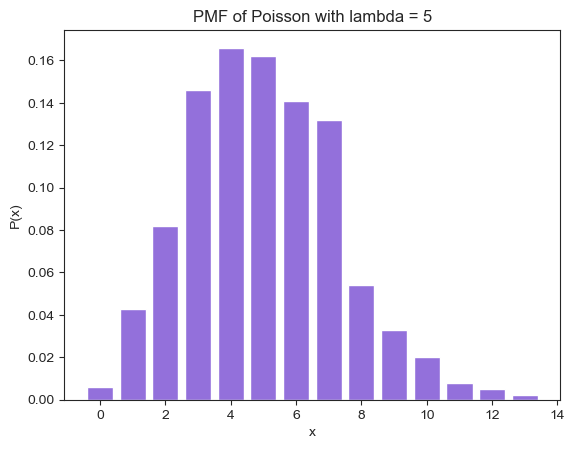

In [133]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

### Mixture Distributions

Adapted from [Stack Overflow post](https://stackoverflow.com/questions/47759577/creating-a-mixture-of-probability-distributions-for-sampling):

Multinomial distribution (driven by `np.random.choice()`) with probabilities set by `coefficients` array determines which of the three distributions to sample from.

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


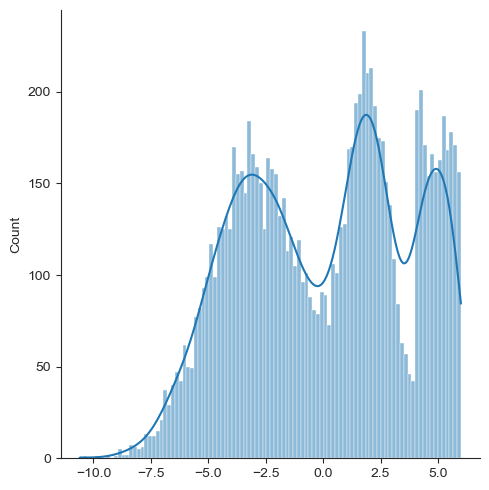

In [134]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

**Gaussian mixture model** (GMM) is common type of mixture distribution, wherein all of the component distributions are normal.

## Part 3: Information Theory

The **self-information** formula is: 
$$ I(x)=-\text{log}P(x) $$

In [135]:
def self_info(my_p):
    return -1*np.log(my_p)

In [136]:
self_info(1)

-0.0

In [137]:
self_info(0.1)

2.3025850929940455

In [138]:
self_info(0.01)

4.605170185988091

In [139]:
self_info(0.5)

0.6931471805599453

In [140]:
self_info(0.5) + self_info(0.5)

1.3862943611198906

Depending on what logarithm base we use, the units of self-information vary. Most frequently, the units are either:

* **nats**: 
    * Natural logarithm, as above with `np.log()` 
    * Typical in ML
* **bits**: 
    * Base-2 logarithm
    * A.k.a. **shannons**
    * Typical in computer science

So, the self-information of $P(x) = 0.1$ is ~2.3 nats.

### Shannon and Differential Entropy

To quantify uncertainty about a probability distribution (as opposed to a single event), we can use **Shannon entropy**, which is denoted $H(x)$ or $H(P)$: 
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Conveys the expected informational content associated with an event drawn from the distribution:
* **Low entropy**: 
    * Distribution is ~deterministic and outcomes are ~certain
    * E.g., weighted coin always lands heads up ($P(1)=1$)
* **High entropy**: 
    * Outcomes are uncertain
    * Uniform distribution can be highest entropy
    * E.g., coin is as likely to be heads as tails ($P(0)=P(1)=0.5$)

As an example, Shannon entropy for a binary random variable (e.g., coin flip) is: 
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [141]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

Will throw `nan` with $p=0$ (always tails) or $p=1$ (always heads), but we can get close: 

In [142]:
binary_entropy(0.00001)

0.00012512920464949012

In [143]:
binary_entropy(0.99999)

0.00012512920464901166

In [144]:
binary_entropy(0.9)

0.3250829733914482

In [145]:
binary_entropy(0.5)

0.6931471805599453

In [146]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points

In [147]:
H = binary_entropy(p)

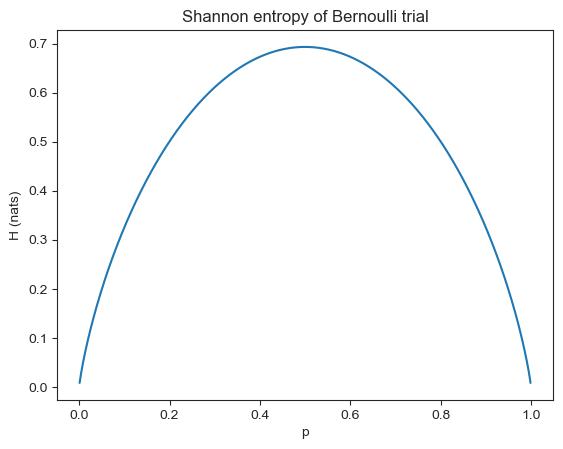

In [148]:
fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)

**Differential entropy**: simply the term for Shannon entropy if distribution is PDF

### Kullback-Leibler Divergence

**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is: 
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

### Cross-Entropy

Cross-entropy is a concept derived from KL divergence. Its detail is beyond the scope of this series except to mention that it provides us with the **cross-entropy cost** function. 

This cost function is ubiquitous in neural networks as it's the cost function of choice for predicting discrete, categorical outcomes. E.g., for a binary classifier, the cross-entropy cost ($C$) is: 

$$ C = -(y \cdot \text{log}(\hat{y}) + (1-y) \cdot \text{log}(1-\hat{y})) $$

In [149]:
def cross_entropy(y, a):
    return -1*(y*np.log(a) + (1-y)*np.log(1-a))

In [150]:
cross_entropy(1, 0.9997)

0.00030004500900199243

In [151]:
cross_entropy(1, 0.9)

0.10536051565782628

In [152]:
cross_entropy(1, 0.6)

0.5108256237659907

In [153]:
cross_entropy(1, 0.3)

1.2039728043259361

## Part 4: Introduction to Statistics

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered above, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [154]:
x_i = 85
mu = 60
sigma = 10

In [155]:
x = np.random.normal(mu, sigma, 10000)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


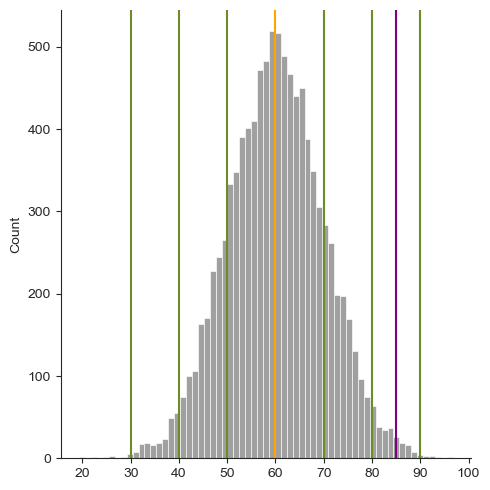

In [156]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean: 

In [157]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students: 

In [158]:
z = (x_i - np.mean(x))/np.std(x)
z

2.507440902993369

Less than one percent of the class outperformed you: 

In [159]:
len(np.where(x > 85)[0])

67

In [160]:
100*69/10000

0.69

In [161]:
np.percentile(x, 99)

83.72868436655098

In contrast, if the mean score of your peers is 90 and the standard deviation is 2: 

In [162]:
mu = 90
sigma = 2

In [163]:
y = np.random.normal(mu, sigma, 10000)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


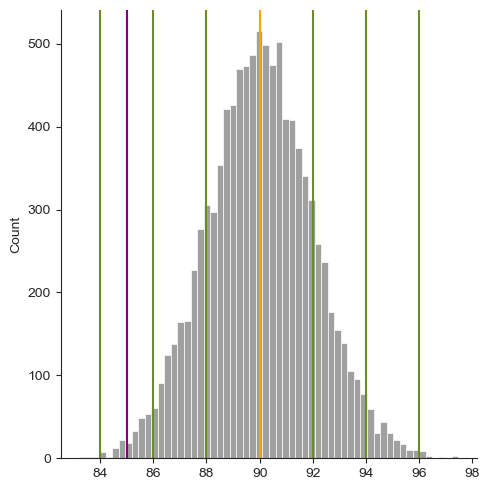

In [164]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!): 

In [165]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students: 

In [166]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.511702338731708

In which case, over 99% of the class outperformed you: 

In [167]:
len(np.where(y > 85)[0])

9944

In [168]:
100*9933/10000

99.33

A mere 67 folks attained worse: 

In [169]:
10000-9933

67

In [170]:
np.percentile(y, 1)

85.43287873188908

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**. 

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

**Exercises**

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch? 
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition? 

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone. 

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time: 
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF): 

In [171]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [172]:
p_below*10000

62.096653257761325

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


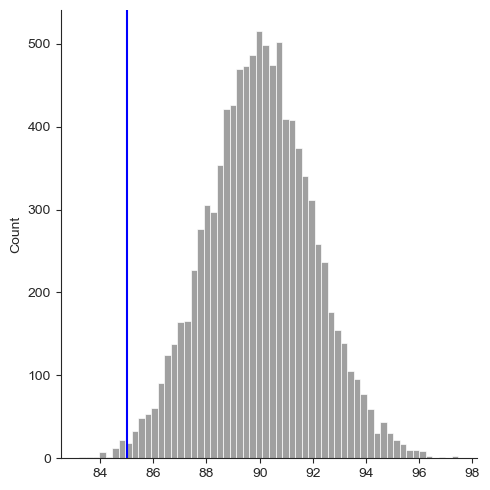

In [173]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [174]:
st.norm.cdf(2.5)

0.9937903346742238

In [175]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [176]:
p_above*10000

62.09665325776159

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


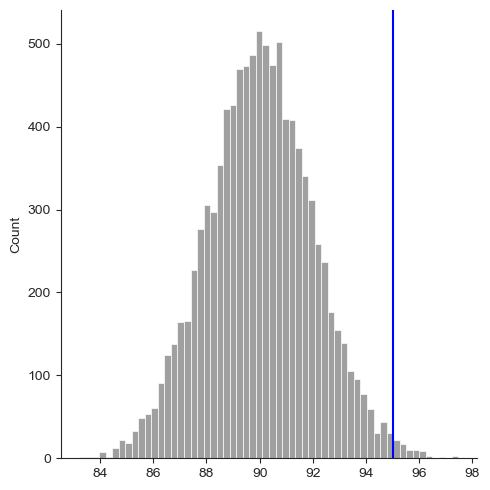

In [177]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [178]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [179]:
p_outside*10000

124.1933065155229

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


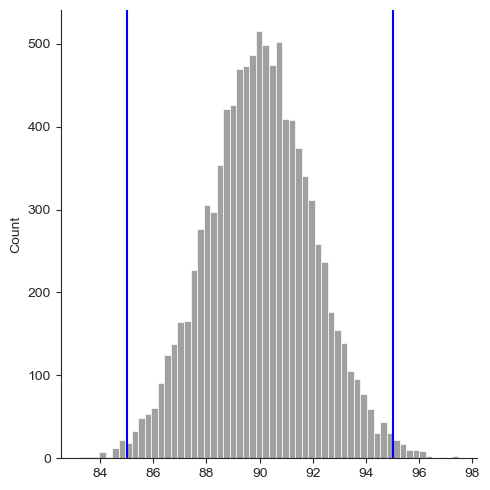

In [180]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method above.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top: 

In [181]:
st.norm.ppf(.025)

-1.9599639845400545

In [182]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


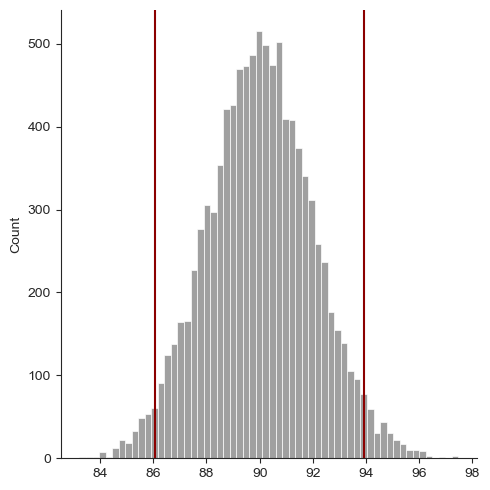

In [183]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

With a stricter threshold, say $\alpha = .01$:

In [184]:
st.norm.ppf(.005)

-2.575829303548901

In [185]:
st.norm.ppf(.995)

2.5758293035489004

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


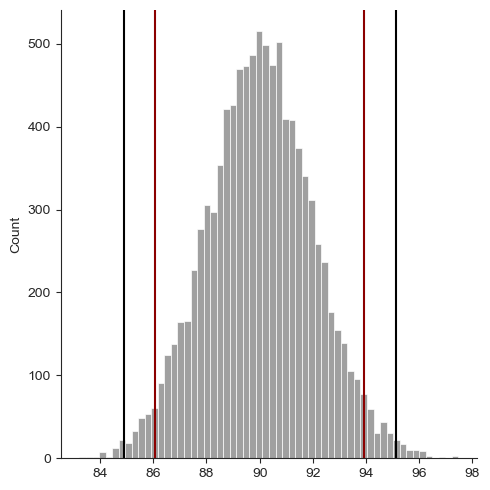

In [186]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

(Time-permitting, a discussion of two-tailed vs one-tailed *p*-value tests would be informative here.)

**Exercises**

1. What are the *p*-values associated with your weightlifting results from the three preceding exercises? 
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?

### Comparing Means with *t*-tests

Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Student's Single-Sample *t*-test

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a *z*-score: 
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by: 
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where: 
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments: 

In [187]:
x = [48, 50, 54, 60]

We can obtain the *t*-statistic for this sample as follows: 

In [188]:
xbar = np.mean(x)
xbar

53.0

In [189]:
sx = st.sem(x)
sx

2.6457513110645907

In [190]:
t = (xbar-50)/sx
t

1.1338934190276817

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [191]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [192]:
p_from_t(t, len(x))

0.33925405085645427

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method: 

In [193]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.33925405085645427, df=3)

#### Welch's Independent *t*-test

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an **independent *t*-test**. 

In [194]:
penguins = sns.load_dataset('penguins').dropna() # some rows are missing data

In [195]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [196]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [197]:
adelie = penguins[penguins.species == 'Adelie']

In [198]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [199]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [200]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

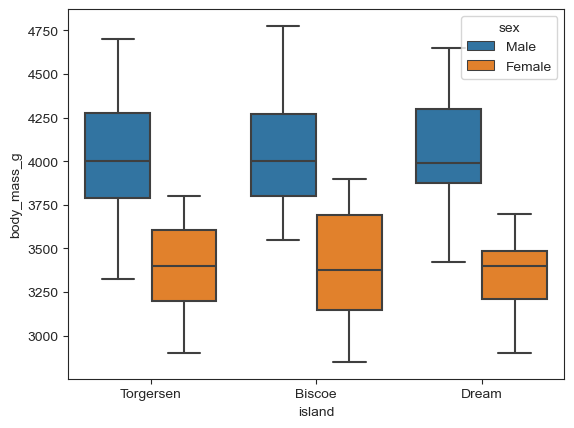

In [201]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

Mass doesn't appear to vary by island, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex so let's take a closer look: 

In [202]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [203]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [204]:
fbar = f.mean()
fbar

3.368835616438356

In [205]:
mbar = m.mean()
mbar

4.043493150684932

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where: 
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes

**N.B.**: Student's independent *t*-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).

In [206]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [207]:
nf = f.size
nm = m.size

In [208]:
t = (fbar-mbar)/(sf/nf + sm/nm)**(1/2)
t

-13.126285923485879

Degrees of freedom for calculating the *p*-value are estimated using the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation), which we won't detail but is defined as: 

In [209]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [210]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [211]:
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

6.402319748031473e-26

In [212]:
p_from_t(t, df+1)

6.402319748031473e-26

In [213]:
-np.log10(p)

25.193662639886046

In [214]:
st.ttest_ind(f, m, equal_var=False) 

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031473e-26, df=135.69357893530386)

#### Student's Paired *t*-test

Occasionally, we have two vectors where each element in vector *x* has a corresponding element in vector *y*. 

For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day (experimental condition) and a sugar pill placebo (control condition) on another day. We can then measure the patients' forgetfulness on both days to test whether the drug has a significant impact on memory.

For a given sample size, such a paired *t*-test is more powerful relative to an unpaired (independent) *t*-test because the variance of *x* is directly related to the variance in *y*: A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetful on both days. With paired samples, we capture this power by comparing the *difference* between *x* and *y*, e.g., the difference in forgetfulness for a given patient when given the drug relative to when given the sugar pill.

In contrast, consider the penguin dataset, wherein we wouldn't be able to obviously pair a given male penguin with a correponding female penguin. Or consider a situation where we provide a drug to one set of Alzheimer's patients while we provide a placebo to an entire different (an independent) group of patients. Indeed, with an independent *t*-test we could even have different sample sizes in the two groups whereas this is impossible with a paired *t*-test. 

Here's an example: 

In [215]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


There are 30 people in the dataset, with their pulse taken at three different time points in an experiment (i.e, after one, 15, and 30 minutes). Ten people were assigned to each of three activity groups: 

In [216]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Within each of those activity groups, half of the participants are on a low-fat diet while the other half are on a no-fat diet: 

In [217]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

For simplicity, let's only consider one of the six experimental groups, say the walking, no-fat dieters: 

In [218]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


(Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


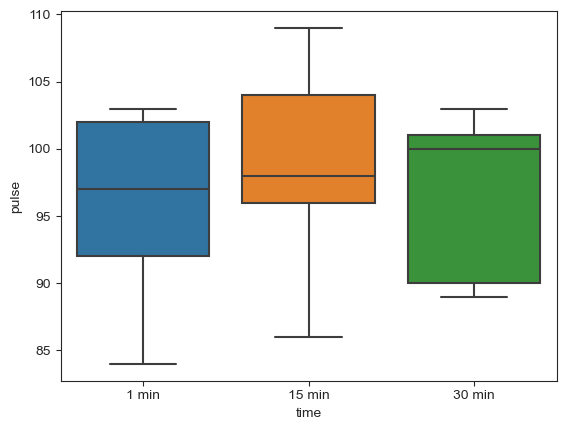

In [219]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [220]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [221]:
min1.mean()

95.6

In [222]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [223]:
min15.mean()

98.6

In [224]:
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [225]:
min30.mean()

96.6

(With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples, e.g.:)

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


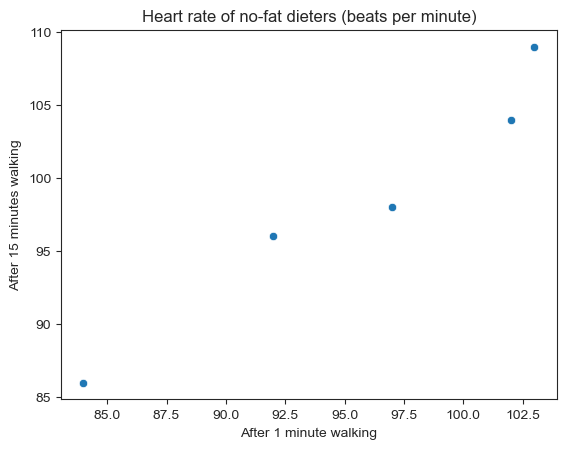

In [226]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test: 
$$ t = \frac{{\bar{d}} - \mu_0}{s_{\bar{d}}} $$ 
Where: 
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_{\bar{d}}$ is the standard error of the differences

(Note how similar to single-sample *t*-test formula.)

In [227]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [228]:
dbar = d.mean()
dbar

3.0

In [229]:
sd = st.sem(d)
sd

0.8944271909999159

In [230]:
t = (dbar-0)/sd
t

3.3541019662496847

In [231]:
p_from_t(t, d.size)

0.02846020325433834

In [232]:
st.ttest_rel(min15, min1)

TtestResult(statistic=3.3541019662496847, pvalue=0.02846020325433834, df=4)

In contrast, if we were to put the same values into an independent *t*-test...

In [233]:
st.ttest_ind(min15, min1, equal_var=False)

TtestResult(statistic=0.5729114862838532, pvalue=0.5826164805627767, df=7.91150470414055)

#### Machine Learning Examples

* Single-sample: Does my stochastic model tend to be more accurate than an established benchmark? 
* Independent samples: Does my model have unwanted bias in it, e.g., do white men score higher than other demographic groups with HR model? 
* Paired samples: Is new TensorFlow.js model significantly faster? (paired by browser / device)

**Exercises**
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: `[48, 50, 54, 60, 49, 55, 59, 62]`. What is the *t*-statistic and is it significantly different from the 50L-yielding baseline process? 
2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex? 
2. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest? 

### Confidence Intervals

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula: 
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where: 
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast: 

In [234]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [235]:
xbar = x.mean()
s = x.std()
n = x.size

In [236]:
z = 1.96

In [237]:
def CIerr_calc(my_z, my_s, my_n):
    return my_z*(my_s/my_n**(1/2))

In [238]:
CIerr = CIerr_calc(z, s, n)

In [239]:
CIerr

3.4637403013216796

In [240]:
xbar + CIerr

58.08874030132168

In [241]:
xbar - CIerr

51.16125969867832

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined: 

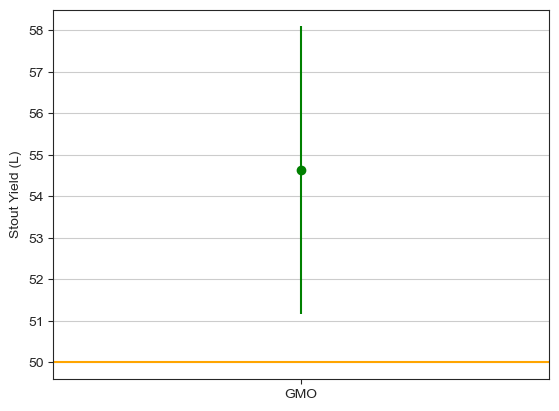

In [242]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

Similarly, we can compare several sample means with CIs. Using our penguins again: 

In [243]:
fCIerr = CIerr_calc(z, sf, nf)
mCIerr = CIerr_calc(z, sm, nm)

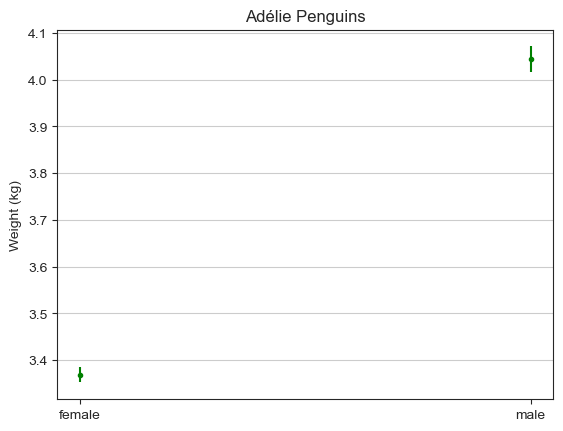

In [244]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr], 
                fmt='.', color='green')

The CIs are nowhere near overlapping, corresponding to the extremely significant (-log*P* $\approx 25$) difference in penguin weight.

In contrast, the CIs for female penguins from the three islands...

In [245]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [246]:
means = [t.mean(), b.mean(), d.mean()]

In [247]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package

In [248]:
nt, nb, nd = t.size, b.size, d.size

In [249]:
CIerrs = [CIerr_calc(z, s_t, nt), CIerr_calc(z, sb, nb), CIerr_calc(z, sd, nd)]

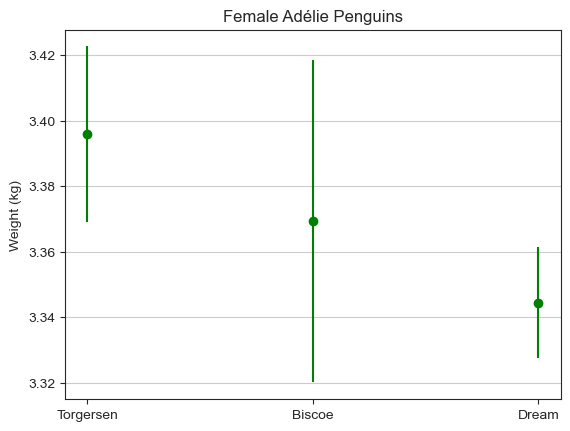

In [250]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs, 
                fmt='o', color='green')

### ANOVA: Analysis of Variance

**Analysis of variance** (ANOVA) enables us to compare more than two samples (e.g., all three islands in the case of penguin weight) in a single statistical test.

To apply ANOVA, we must make three assumptions: 
1. Independent samples
2. Normally-distributed populations
3. *Homoscedasticity*: Population standard deviations are equal

While not especially complicated under the hood (you can dig into the formulae [here](https://en.wikipedia.org/wiki/Analysis_of_variance#Logic)), ANOVA might be the least widely-applicable topic within *Intro to Stats* to ML so in the interest of time, we'll skip straight to the Python code: 

In [251]:
st.f_oneway(t, b, d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

### Pearson Correlation Coefficient

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [252]:
x = iris.sepal_length
y = iris.petal_length

In [253]:
sns.set_style('darkgrid')

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


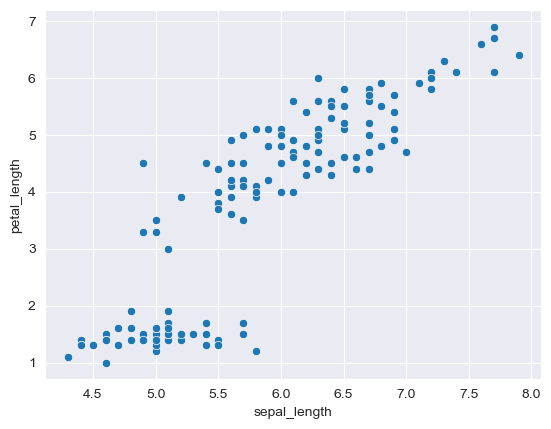

In [254]:
_ = sns.scatterplot(x=x, y=y)

In [255]:
n = iris.sepal_width.size

In [256]:
xbar, ybar = x.mean(), y.mean()

In [257]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [258]:
cov = sum(product)/n
cov

1.2658200000000006

In [259]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

We reached this point in *Probability*. Now, as for how to determine a *p*-value, we first calculate the *t*-statistic...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [260]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

...which we can convert to a *p*-value as we've done several times above: 

In [261]:
p = p_from_t(t, n-1) 
p

1.0386674194495906e-47

In [262]:
-np.log10(p)

46.98352349096045

This confirms that iris sepal length is extremely positively correlated with petal length.

All of the above can be done in a single line with SciPy's `pearsonr()` method: 

In [263]:
st.pearsonr(x, y)

PearsonRResult(statistic=0.8717537758865833, pvalue=1.0386674194496243e-47)

And, for reference, here's a correlation that is not significant ($r \approx 0$): 

/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zanelim/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


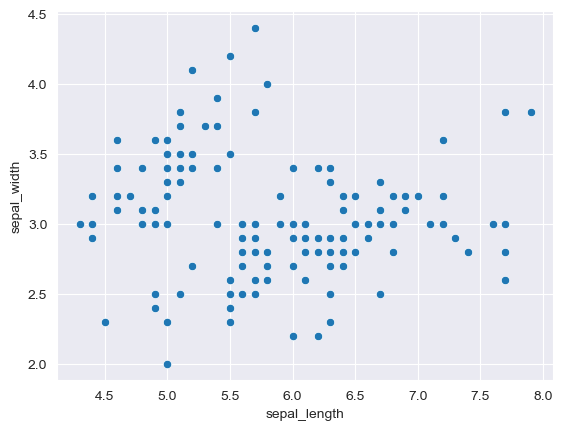

In [264]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [265]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.1518982607114483)

### The Coefficient of Determination

...also known as $r^2$, this is the proportion of variance in one variable explained by another. 

It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [266]:
rsq = r**2
rsq

0.7599546457725157

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other; more on that in Segment 2.)

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length: 

In [267]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080679

### Correlation vs Causation

Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa. 

There is a lot to causality and I recommend Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), the classic technical text on the topic, if you're keen to explore this in depth. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) is an exceptional lay alternative by the same author.

In brief, three criteria are required for inferring causal relationships: 

1. **Covariation**: Two variables vary together (this criterion is satisfied by sepal and petal length)
2. **Temporal precedence**: The affected variable must vary *after* the causal variable is varied. 
3. **Elimination of extraneous variables**: We must be sure no third variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable, e.g., with (ideally double-blind) randomized control trials. 

Some examples of where we could infer causality from correlation in ML: 
* Additional neurons --> higher accuracy
* Additional servers or RAM --> shorter inference time
* Removal of pronouns --> less unwanted bias

### Correcting for Multiple Comparisons

A major issue with frequentist statistics is the issue of multiple comparisons:

* If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a *false positive* or *Type I error*).
* If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the **Bonferroni correction** (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni). Assuming, we'd like an overall $\alpha = .05$: 

* If we're planning on conducting ten tests ($m=10$), the significance threshold for each individual test is $\frac{\alpha}{m} = \frac{.05}{10} = .005$
* With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
* With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the *General methods of alpha adjustment for multiple comparisons* heading [here](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#See_also).)